# Erweiterung des KNN und Nutzung von TensorBoard

## Vorgehensweise

#### 1. Datenvorbereitung  
    1.1 Daten laden  
    1.2 Aufteilung in Trainings- und Testdaten  
    1.3 Resampling  
    1.4 Skalierung der Eingabewerte  

#### 2. Modellerstellung  
    2.1 Netzstruktur nach Rekurrenten neuronalen Netz definieren  
    2.2 Callbacks definieren  
    2.3 Modell mit Callbacks trainieren
      
#### 3. Validierung   
    3.1 Accuracy und Loss-Function   
    3.2 Confusion Matrix  
    3.3 Recall, Precision & F1 Score  
    3.4 ROC / AUC Kurve  


## 1. Datenvorbereitung

### 1.1 Daten Laden

In [1]:
import numpy as np
import pandas as pd

# gesamtes Feature-Set
# data_vec = pd.read_pickle("#######/data/gesamtes_feature_set")

# reduziertes Feature-Set
data_vec = pd.read_pickle("#######/data/reduziertes_feature_set")


In [2]:
data_vec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49366 entries, 0 to 49726
Data columns (total 35 columns):
NIEDERSCHLAG_MENGE          49366 non-null float64
DAMPFDRUCK_MITTEL           49366 non-null float64
TEMP_MITTEL                 49366 non-null float64
LUFTFEUCHTE_MITTEL          49366 non-null float64
TEMP_MAX_2M                 49366 non-null float64
TEMP_MIN_2M                 49366 non-null float64
TEMP_MIN_BODEN              49366 non-null float64
GRENZWERTUEBERSCHREITUNG    49366 non-null category
NIEDERSCHLAG_MENGE_TMP      49366 non-null float64
dummy_Hintergrund           49366 non-null uint8
dummy_Industrie             49366 non-null uint8
dummy_Verkehr               49366 non-null uint8
dummy_ohne Zuordnung        49366 non-null uint8
dummy_Frühling              49366 non-null uint8
dummy_Herbst                49366 non-null uint8
dummy_Sommer                49366 non-null uint8
dummy_Winter                49366 non-null uint8
dummy_2012                  49366 non-n

### 1.2 Aufteilung in Trainings- und Testdaten (80%/20%)

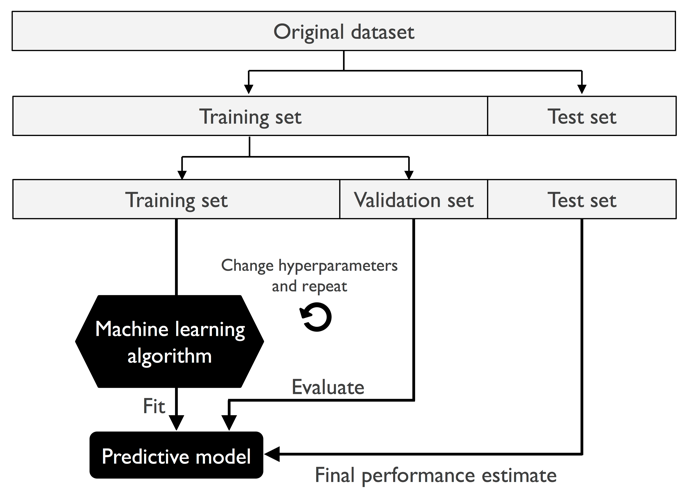

In [3]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_vec, test_size=0.2, random_state=1234)

print("Daten im Trainingsset : " + str(len(train_set)))
print("Daten im Testset : " + str(len(test_set)))


Daten im Trainingsset : 39492
Daten im Testset : 9874


In [4]:
x_train = train_set.drop(columns = ["GRENZWERTUEBERSCHREITUNG"])
y_train = train_set["GRENZWERTUEBERSCHREITUNG"]

x_test = test_set.drop(columns = ["GRENZWERTUEBERSCHREITUNG"])
y_test = test_set["GRENZWERTUEBERSCHREITUNG"]

input_dim = len(x_train.columns)

### 1.3 Resampling

In [5]:
data_vec["GRENZWERTUEBERSCHREITUNG"].value_counts().plot(kind="bar", title = "Verteilung vor dem Resampling")

#### Oversampling via SMOTE

In [6]:
from imblearn.over_sampling import SMOTE

In [7]:
# orignial x_train und y_train speichern
x_train_alt = x_train
y_train_alt = y_train

In [8]:
# x_train und y_train resamplen
sm = SMOTE(random_state=123)
x_train, y_train = sm.fit_sample(x_train_alt, y_train_alt)

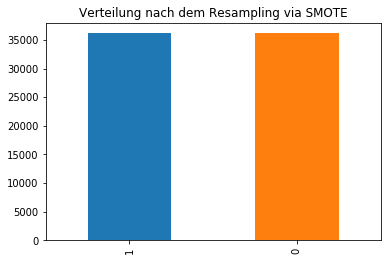

In [9]:
pd.Series(data=y_train).value_counts().plot(kind="bar", title="Verteilung nach dem Resampling via SMOTE")

### 1.4 Skalierung der Eingabewerte

In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler 

scaler = MinMaxScaler()
#scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [11]:
pd.DataFrame(x_train_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
count,72288.000000,72288.000000,72288.000000,72288.000000,72288.000000,72288.000000,72288.000000,72288.000000,72288.000000,72288.000000,...,72288.000000,72288.000000,72288.000000,72288.000000,72288.000000,72288.000000,72288.000000,72288.000000,72288.000000,72288.000000
mean,0.023870,0.348786,0.466003,0.684578,0.444471,0.505558,0.564396,0.023870,0.166879,0.597435,...,0.169268,0.098823,0.060488,0.050664,0.051637,0.049908,0.057386,0.060659,0.065513,0.084849
std,0.057090,0.184814,0.172043,0.168044,0.179226,0.159103,0.149957,0.057090,0.356130,0.464526,...,0.366547,0.292743,0.235237,0.216657,0.218747,0.215691,0.229159,0.235447,0.242784,0.272744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.208145,0.331805,0.577315,0.304069,0.389889,0.459091,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.308447,0.464891,0.705665,0.434690,0.495000,0.547727,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.018364,0.466063,0.598063,0.811422,0.584582,0.627500,0.677273,0.018364,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2. Modellerstellung

### Änderung 1: Dropout
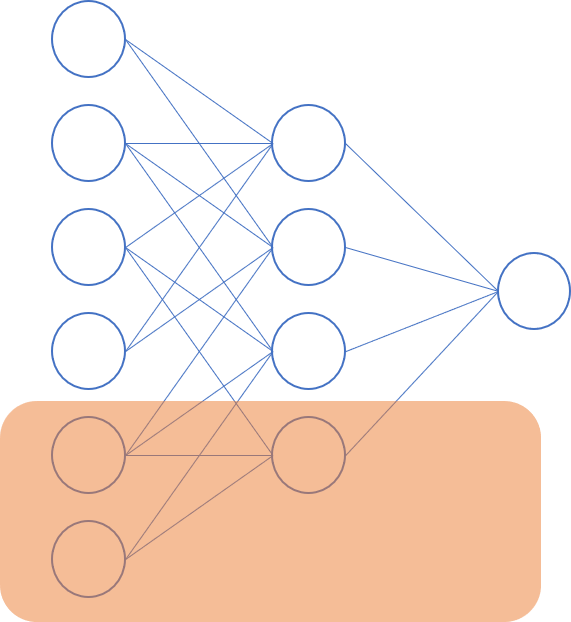

#### Ausschalten von Verbindungen während einer Lerniteration zur Minderung des Overfitting Effekts


### Änderung 2: Anpassen der Aktivierungsfunktion

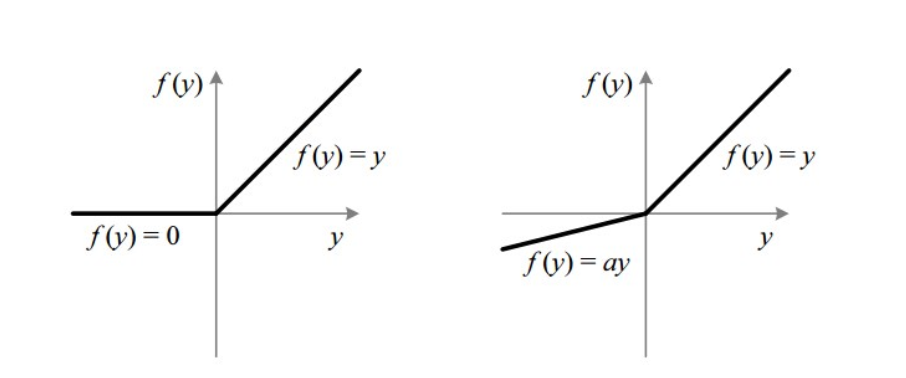

Quelle:https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

#### Bessere Anpassung an die Daten, da auch negative Werte weitergegeben werden

### 2.1 Netzstruktur erstellen

In [12]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU

drop = 0.2
alpha = 0.3


## Rohform des Modells
NN = Sequential()


## Eingabeschicht 
NN.add(Dense(64,input_dim=input_dim,
             kernel_initializer="random_uniform"))
NN.add(LeakyReLU(alpha))
NN.add(Dropout(drop))


## Zwischenschichten

# HL1
NN.add(Dense(128, kernel_initializer="normal"))
NN.add(LeakyReLU(alpha))
NN.add(Dropout(drop))

# HL2
NN.add(Dense(256, kernel_initializer="normal"))
NN.add(LeakyReLU(alpha))
NN.add(Dropout(drop))

# HL3
NN.add(Dense(128, kernel_initializer="normal")) 
NN.add(LeakyReLU(alpha))
NN.add(Dropout(drop))

# HL4
NN.add(Dense(64, kernel_initializer="normal"))
NN.add(LeakyReLU(0.3))
NN.add(Dropout(drop))

# HL5
NN.add(Dense(32, kernel_initializer="normal"))
NN.add(LeakyReLU(alpha))
NN.add(Dropout(drop))

# HL6 - letzter HiddenLayer ohne Dropout, damit Ausgabeschicht alle Informationen erhält.
NN.add(Dense(16, kernel_initializer="normal"))
NN.add(LeakyReLU(alpha))


## Ausgabeschicht
NN.add(Dense(1, kernel_initializer="random_uniform", activation="sigmoid"))


## Modell bauen
NN.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['accuracy']) 


C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [13]:
NN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                2240      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
__________

### 2.2 Callbacks definieren

#### Callbacks definieren

In [14]:
from keras.callbacks import TensorBoard 
callbacks = [TensorBoard(log_dir='./Graph/Metrik/reduziertFeatures_smote_drop0,2', histogram_freq=10, batch_size=32, 
                              write_graph=False, write_grads=False, 
                              write_images=False, embeddings_freq=0, 
                              embeddings_layer_names=None, embeddings_metadata=None, 
                              embeddings_data=None),
            #keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10),
            #keras.callbacks.EarlyStopping(monitor='val_loss', patience=20),
            #keras.callbacks.ModelCheckpoint(filepath="./Modelle/callbacks.h5", monitor="val_loss", save_best_only=True)
            ]

### 2.3 Modell trainieren

In [15]:
trainingshistorie = NN.ﬁt(x_train_scaled, y_train, validation_split=0.25, batch_size=32,
                          epochs=10, verbose=True, 
                          callbacks = callbacks) # Callbacks mitgeben

Train on 54216 samples, validate on 18072 samples
Epoch 1/10
54216/54216 [==============================] - 13s 235us/step - loss: 0.4513 - acc: 0.7933 - val_loss: 0.3985 - val_acc: 0.8372
Epoch 2/10
54216/54216 [==============================] - 11s 196us/step - loss: 0.4003 - acc: 0.8200 - val_loss: 0.5692 - val_acc: 0.7808
Epoch 3/10
54216/54216 [==============================] - 11s 198us/step - loss: 0.3775 - acc: 0.8312 - val_loss: 0.4616 - val_acc: 0.8060
Epoch 4/10
54216/54216 [==============================] - 12s 214us/step - loss: 0.3650 - acc: 0.8379 - val_loss: 0.5343 - val_acc: 0.7963
Epoch 5/10
54216/54216 [==============================] - 10s 188us/step - loss: 0.3543 - acc: 0.8435 - val_loss: 0.3623 - val_acc: 0.8611
Epoch 6/10
54216/54216 [==============================] - 13s 241us/step - loss: 0.3447 - acc: 0.8489 - val_loss: 0.3731 - val_acc: 0.8542
Epoch 7/10
54216/54216 [==============================] - 11s 208us/step - loss: 0.3406 - acc: 0.8479 - val_loss: 0.

#### Acc und Loss der Trainings- und Validierungsdaten 
# --- TENSORBOARD ---

## 3. Validierung des Modells

#### Testdaten vorhersagen

In [25]:
# Testdaten vorhersagen
y_test_vorhersage = np.round(NN.predict(x_test_scaled).reshape(x_test_scaled.shape[0],))

### 3.1 Accuracy auf den Testdaten

In [26]:
NN.metrics_names

['loss', 'acc']

In [24]:
NN.evaluate(x_test_scaled, y_test)

9874/9874 [==============================] - 0s 38us/step


[0.24379874318868303, 0.8954830868948754]

### 3.2 Confusion-Matrix

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
y_true = y_test
y_pred = y_test_vorhersage
confmat = confusion_matrix(y_true, y_pred)

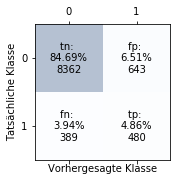

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        if str(i)+str(j) =='00': ax.text(x=j, y=i, s='tn: \n'+str(round((confmat[i,j]/len(y_test)*100),2))+'%\n'+str(confmat[i,j]), va='center', ha='center')
        elif str(i)+str(j) == '01': ax.text(x=j, y=i, s='fp: \n'+str(round((confmat[i,j]/len(y_test)*100),2))+'%\n'+str(confmat[i,j]), va='center', ha='center')
        elif str(i)+str(j) == '10': ax.text(x=j, y=i, s='fn: \n'+str(round((confmat[i,j]/len(y_test)*100),2))+'%\n'+str(confmat[i,j]), va='center', ha='center')
        else: ax.text(x=j, y=i, s='tp: \n'+str(round((confmat[i,j]/len(y_test)*100),2))+'%\n'+str(confmat[i,j]), va='center', ha='center')
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.show()

### 3.3 Precision, Recall & F1-Score

In [30]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('Genauigkeit / Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_test_vorhersage))

print('Trefferquote / Recall: %3f' %recall_score(y_true=y_test, y_pred=y_test_vorhersage))

print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_test_vorhersage))

Genauigkeit / Precision: 0.427
Trefferquote / Recall: 0.552359
F1: 0.482


## Validierung aller Modelle

#### Bewertung des Lernvorganges (Tensorboard)
#### Bewertung der Metriken

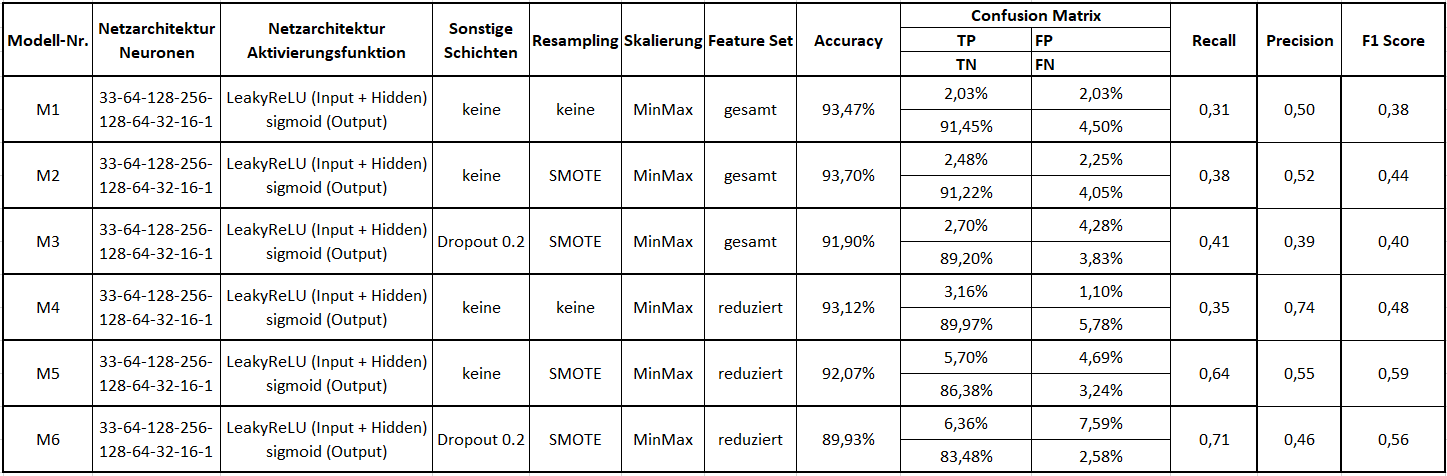

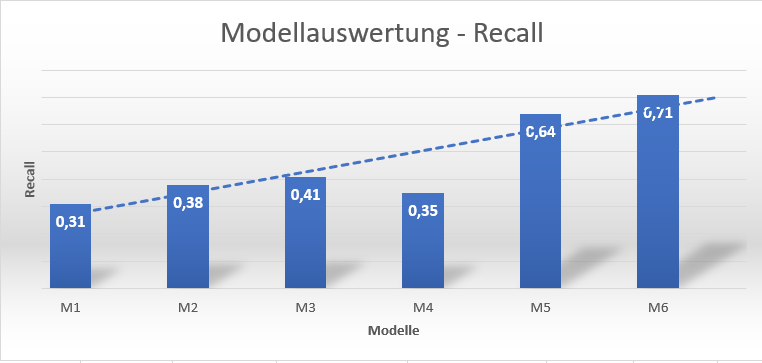

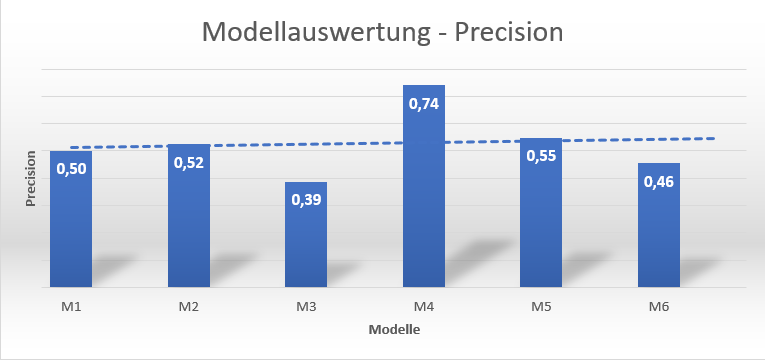

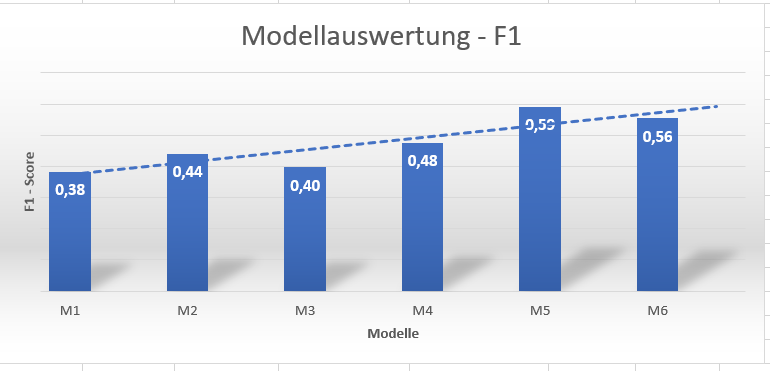

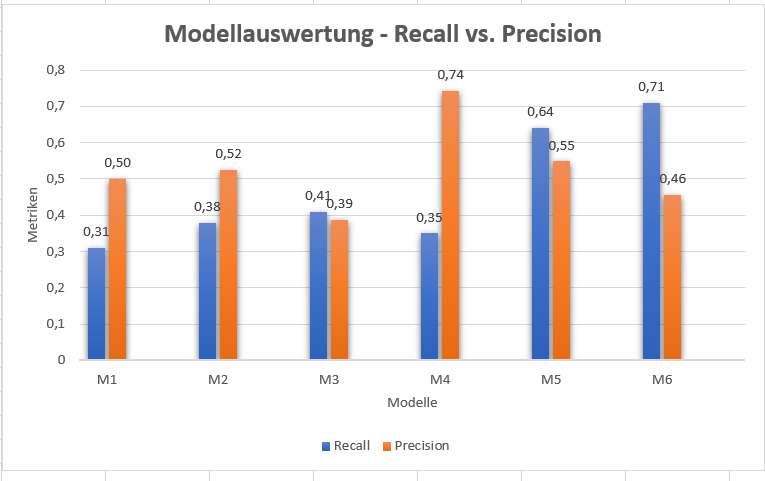